# Rauschen und Impulshöhe bei kapazitiver Last

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm
from scipy.optimize import curve_fit
from math import log, sqrt

Umrechnung der Kanalnummern in Energien: Kalibirierung hat wahrscheinlichste Energie von 5,4857 MeV bei Kanal 3912 ergeben.

In [2]:
def energy_from_channel(channel):
    '''Rückgabe in eV'''
    return 5.4857e6 * channel / 3912

channels = [j+1 for j in range(4096)]
channel_energies = np.array(list(map(energy_from_channel, channels)))

Gauss-Fit und anschließende Ausgabe der FWHM. Diese beträgt $2\sqrt{2\ln(2)}$ der Standardabweichung der Gauss-Verteilung. Bei norm.pdf entspricht scale der Standardabweichung.  norm.pdf(x, loc, scale) entspricht norm.pdf(y) / scale mit y = (x - loc) / scale.

In [3]:
def gauss(x,a,m,c):
    return a*norm.pdf(x,loc=m,scale=c)

def gauss_fit(x, y, start_params):
    popt = curve_fit(gauss,x,y,start_params)
    return popt[0], popt[1]


Funktionen für intrinsische und rauschbedingte Halbwertsbreite. Diese werden allerdings erst benötigt, wenn reale Alpha-Teilchen gemessen werden. Dort dann für die Energien der Peak-Maxima nutzen:

In [4]:
F = 0.115 # Fano-Faktor für Silizium
def fwhm_intrin(E,F):
    return 2.0*sqrt(2.0*log(2.0))*sqrt(3.62*F*E)

def fwhm_rauschen(fwhm,fwhm_intrin):
    return sqrt(fwhm**2-fwhm_intrin**2)

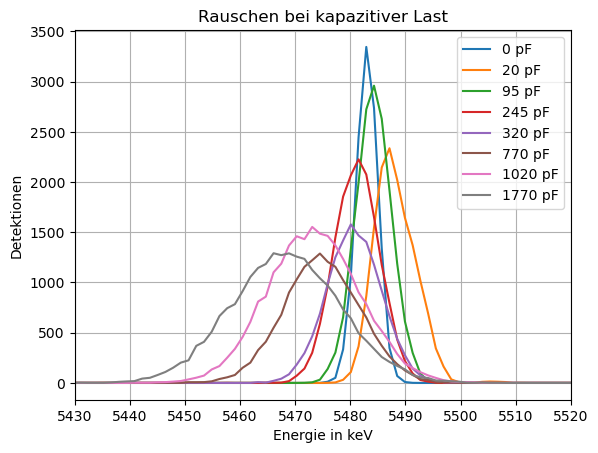

In [5]:
# Daten einlesen
dt = {}
cap_pF = [0,20,95,245,320,770,1020,1770]
for i in cap_pF:
    l=np.loadtxt("data/capacity/capacity_"+str(i)+".TKA")[2:]
    l=np.append([0,0],l)
    dt['cap_pF_'+str(i)] = l

# am besten als Energien darstellen und nicht Kanalnummern...
fig, ax = plt.subplots()

for i in cap_pF:
    ax.plot(channel_energies*1e-3,dt['cap_pF_'+str(i)],label=str(i)+' pF')

ax.set_xlabel('Energie in keV')
ax.set_ylabel('Detektionen')
plt.xlim([5.43e3,5.52e3])
plt.legend()
plt.grid()
plt.title('Rauschen bei kapazitiver Last')
plt.savefig('plots/Rauschen_pF.pdf')

Standardabweichung:  1.9536205468020784
Varianz der Standardabweichung : 3.269505413198472e-07
fwhm:  4.600424823993858
Standardabweichung:  3.697440592969448
Varianz der Standardabweichung : 8.381365563723637e-05
fwhm:  8.706807223635575
Standardabweichung:  3.21332390131001
Varianz der Standardabweichung : 1.7191215329321364e-06
fwhm:  7.566799533981864
Standardabweichung:  4.090365239391184
Varianz der Standardabweichung : 3.6855949922371078e-06
fwhm:  9.632074057216176
Standardabweichung:  4.9403782101830105
Varianz der Standardabweichung : 5.476882031867085e-06
fwhm:  11.633701639373077
Standardabweichung:  6.907868079995148
Varianz der Standardabweichung : 1.93196683798041e-05
fwhm:  16.266786223202033
Standardabweichung:  8.332336402642587
Varianz der Standardabweichung : 2.8936015888845736e-05
fwhm:  19.621152782883836
Standardabweichung:  9.859530082530291
Varianz der Standardabweichung : 3.428524426475829e-05
fwhm:  23.21741907292798
[0.001346476426524876, 0.02155833000904709

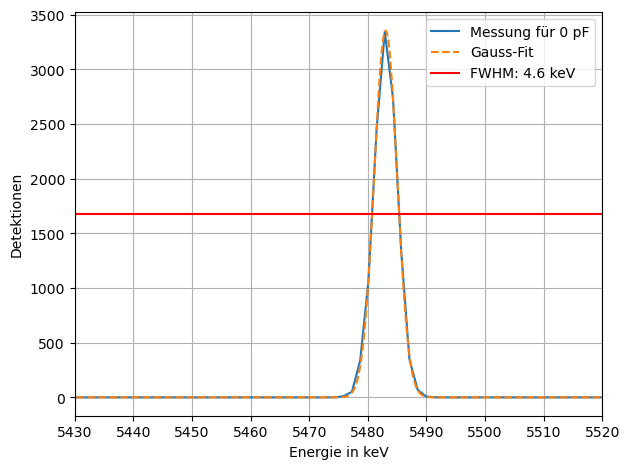

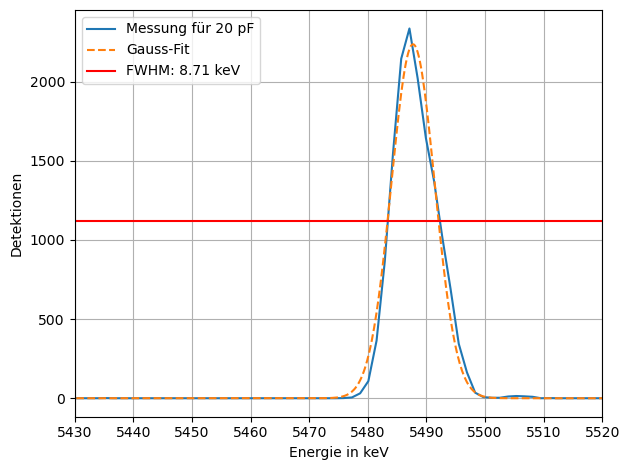

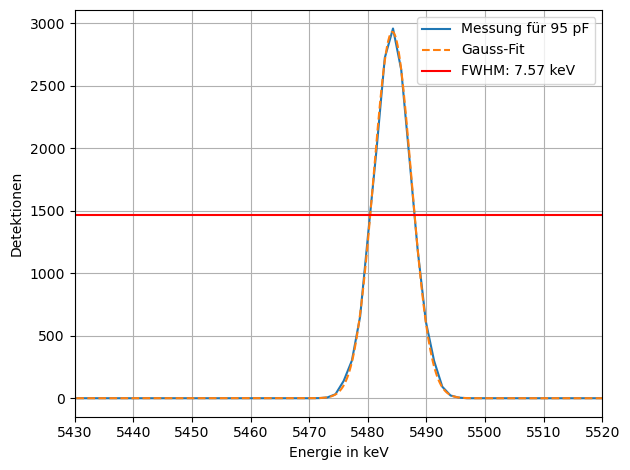

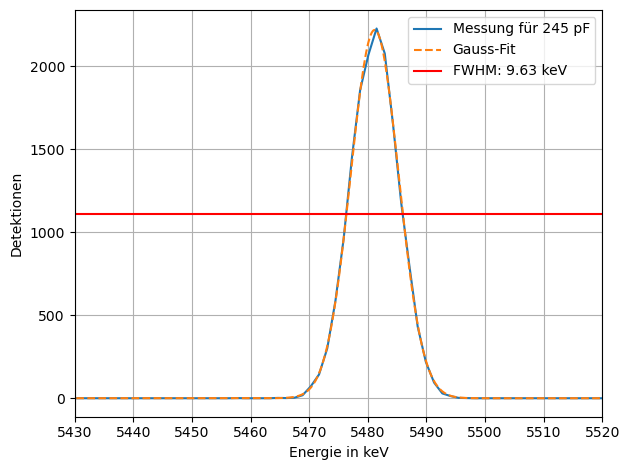

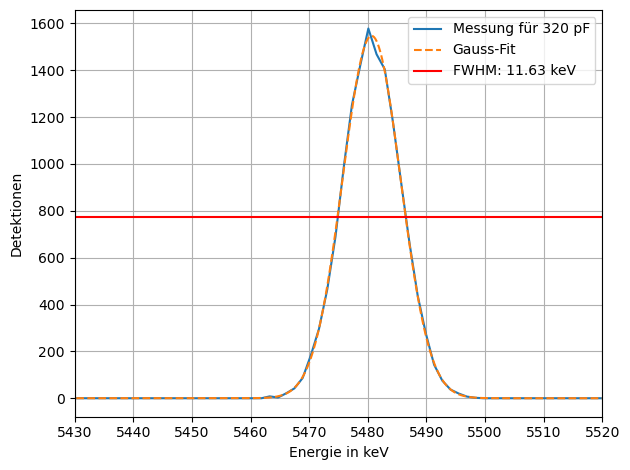

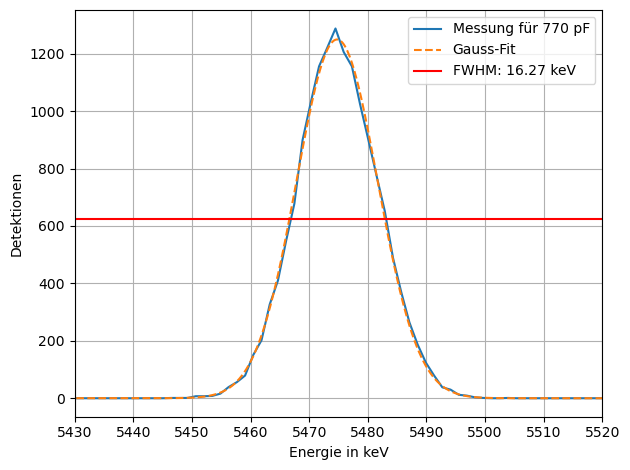

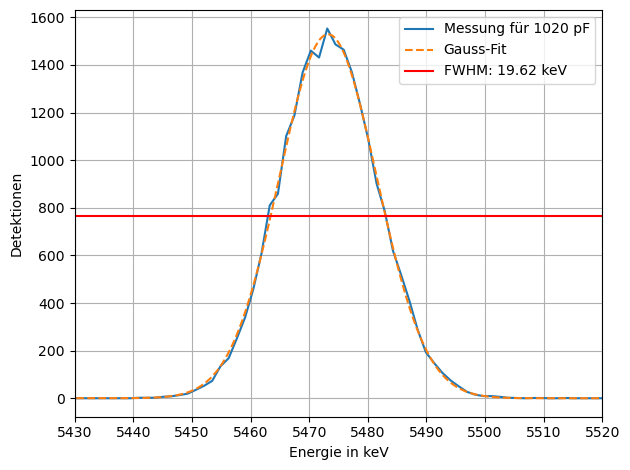

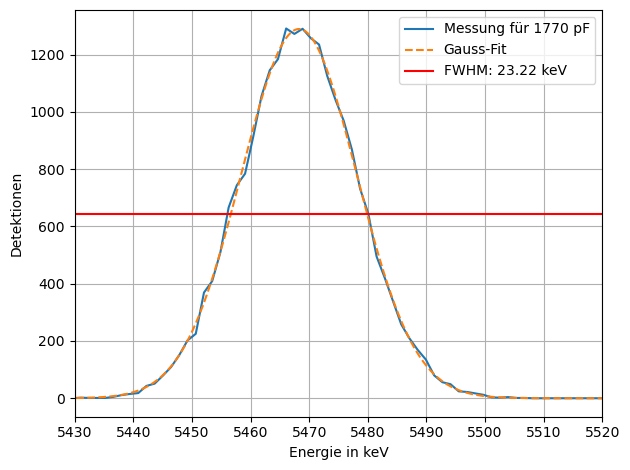

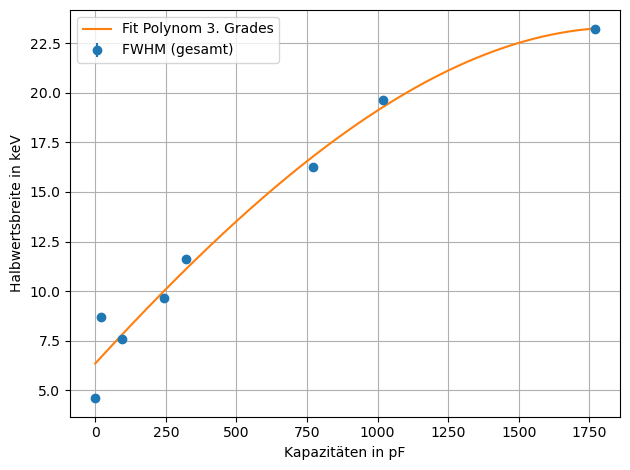

In [8]:
fwhm_list = []
fwhm_error = []
# fwhm_intrin_list = []
# fwhm_rausch_list = []
# fwhm_rausch_error_list = []

for i in cap_pF:
    fit_param = gauss_fit(channel_energies*1e-3,dt['cap_pF_'+str(i)], [2000.,5480.,10])
    a, m, c = fit_param[0]
    fig, ax = plt.subplots()
    ax.plot(channel_energies*1e-3,dt['cap_pF_'+str(i)],label='Messung für '+str(i)+' pF')
    x_for_fit = np.linspace(5400.,5600.,1000)
    y_for_fit = list(map(lambda x: gauss(x,a,m,c), x_for_fit))
    ax.plot(x_for_fit,y_for_fit,linestyle='--',label='Gauss-Fit')
    fwhm = 2.0*sqrt(2.0*log(2.0))*c
    fwhm_list.append(fwhm)
    # Start calculating error for fwhm_gesamt
    var_of_std = fit_param[1][2][2]
    print('Standardabweichung: ',c)
    print('Varianz der Standardabweichung :', var_of_std)
    std_of_std = sqrt(var_of_std)
    fwhm_error.append(2.0*sqrt(2.0*log(2.0))*std_of_std)
    # end calculatiing error
    # start calculating fwhm_intrinsisch
    # fwhm_intrin_list.append(fwhm_intrin(m,F)*1e-3)  # Lage des Gauß-Maximums m entspricht der Energie, Umrechnung in keV!
    # end calculating fwhm_intrinsisch
    # start calculating fwhm_rausch and its error
    print('fwhm: ', fwhm)
    # print('fwhm_intrin: ', fwhm_intrin_list[-1])
    # fwhm_rausch_list.append(fwhm_rauschen(fwhm,fwhm_intrin_list[-1]))
    # fwhm_rausch_error_list.append(fwhm*fwhm_error[-1]/sqrt(fwhm**2-fwhm_intrin_list[-1]**2)) 
    # end calculating fwhm_rausch and its error
    ax.axhline(y = 0.5*max(y_for_fit), color = 'r', linestyle = '-',label='FWHM: '+str(round(fwhm,2))+' keV')
    ax.set_xlabel('Energie in keV')
    ax.set_ylabel('Detektionen')
    plt.xlim([5.43e3,5.52e3])
    plt.legend()
    plt.grid()
    plt.tight_layout()

print(fwhm_error)
# print(fwhm_rausch_error_list)


fig, ax = plt.subplots()
ax.errorbar(cap_pF,fwhm_list,yerr=fwhm_error,ls='none',marker='o',label='FWHM (gesamt)')
# ax.plot(cap_pF,fwhm_intrin_list,label='FWHM (intrinsisch)')
# ax.errorbar(cap_pF,fwhm_rausch_list,yerr=fwhm_rausch_error_list,ls='none',marker='x',label='FWHM (Rauschen)')

# Fitte Polynom 3. Grades an Datenpunkte
polyfit = np.polyfit(cap_pF,fwhm_list,3)
print(polyfit)
c0, c1, c2, c3 = polyfit
poly_x = np.linspace(cap_pF[0],cap_pF[-1],1000)
ax.plot(poly_x,list(map(lambda x: c0*x**3+c1*x**2+c2*x+c3,poly_x)),label='Fit Polynom 3. Grades')

ax.set_xlabel('Kapazitäten in pF')
ax.set_ylabel('Halbwertsbreite in keV')

plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('plots/Entwicklung_FWHM_pF.pdf')

Tabellen mit entsprechenden Halbwertsbreiten und Fehlern

In [9]:
from loader import arr_to_tab

fwhm_list = list(map(lambda x: round(x,4),np.array(fwhm_list)))
fwhm_error = list(map(lambda x: round(x,4),np.array(fwhm_error)+0.5e-4))  #Addiere 0.5e-4, da Fehler immer aufgerundet werden
# fwhm_rausch_list = list(map(lambda x: round(x,4),np.array(fwhm_rausch_list)))
# fwhm_rausch_error_list = list(map(lambda x: round(x,4),np.array(fwhm_rausch_error_list)+0.5e-4))
# fwhm_intrin_list = list(map(lambda x: round(x,4),np.array(fwhm_intrin_list)))

arr_to_tab(cap_pF,fwhm_list,fwhm_error) #,fwhm_rausch_list,fwhm_rausch_error_list,fwhm_intrin_list)

i 0
0 
1 0&
2 0&4.6004&
i 1
0 
1 20&
2 20&8.7068&
i 2
0 
1 95&
2 95&7.5668&
i 3
0 
1 245&
2 245&9.6321&
i 4
0 
1 320&
2 320&11.6337&
i 5
0 
1 770&
2 770&16.2668&
i 6
0 
1 1020&
2 1020&19.6212&
i 7
0 
1 1770&
2 1770&23.2174&


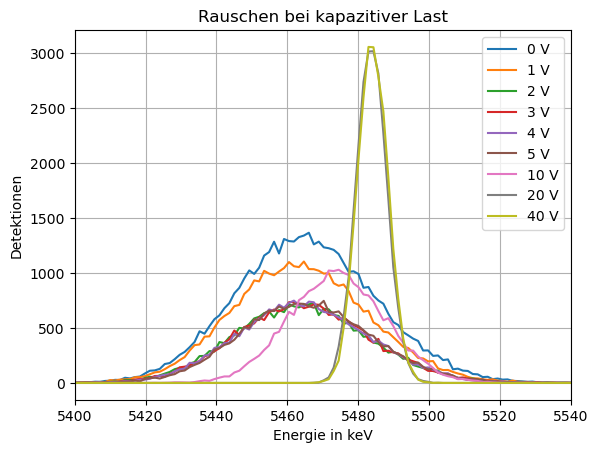

In [10]:
# Daten einlesen
cap_volt = [0,1,2,3,4,5,10,20,40]
for i in cap_volt:
    l=np.loadtxt("data/capacity/cap_volt_"+str(i)+".TKA")[2:]
    l=np.append([0,0],l)
    dt['cap_volt_'+str(i)] = l

# am besten als Energien darstellen und nicht Kanalnummern...
fig, ax = plt.subplots()

for i in cap_volt:
    ax.plot(channel_energies*1e-3,dt['cap_volt_'+str(i)],label=str(i)+' V')

ax.set_xlabel('Energie in keV')
ax.set_ylabel('Detektionen')
plt.xlim([5.4e3,5.54e3])
plt.legend()
plt.grid()
plt.title('Rauschen bei kapazitiver Last')
plt.savefig('plots/Rauschen_volt.pdf')

Standardabweichung:  19.658851306103873
Varianz der Standardabweichung : 0.00024998574639434844
fwhm:  46.29305711789626
Standardabweichung:  19.110311457041874
Varianz der Standardabweichung : 0.00027164450289639085
fwhm:  45.00134448582681
Standardabweichung:  18.982560014121066
Varianz der Standardabweichung : 0.00041324150954449737
fwhm:  44.70051282725527
Standardabweichung:  18.74516444719867
Varianz der Standardabweichung : 0.0003614807355874966
fwhm:  44.14148898766492
Standardabweichung:  18.648727060867245
Varianz der Standardabweichung : 0.00033026958227921855
fwhm:  43.91439629724129
Standardabweichung:  18.407601917292887
Varianz der Standardabweichung : 0.000279189197712943
fwhm:  43.346589975791424
Standardabweichung:  13.425179671418986
Varianz der Standardabweichung : 0.00013414024693724006
fwhm:  31.61388219839944
Standardabweichung:  4.310084904737904
Varianz der Standardabweichung : 2.2514326559469923e-06
fwhm:  10.149474329462127
Standardabweichung:  4.312502328534

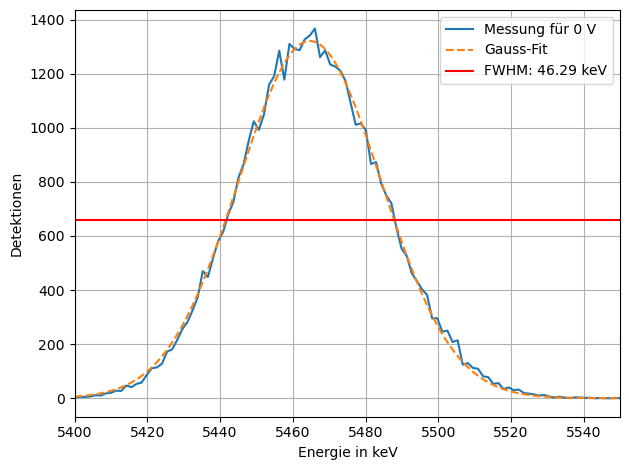

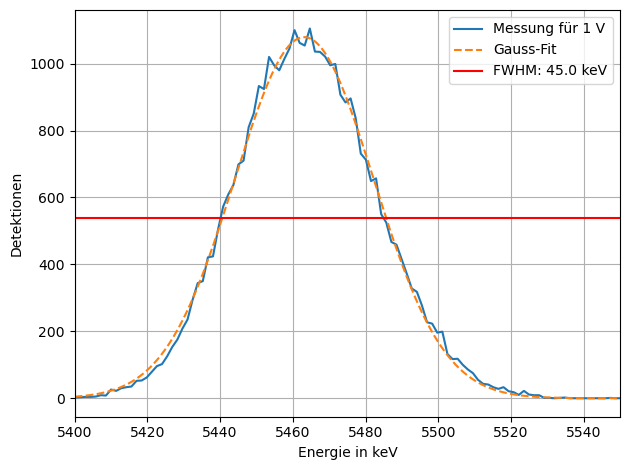

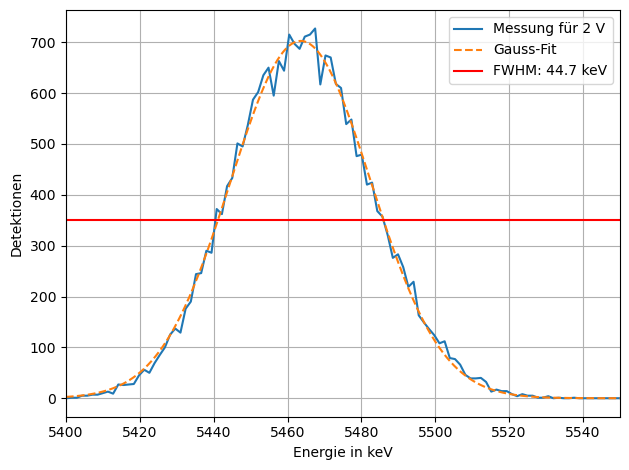

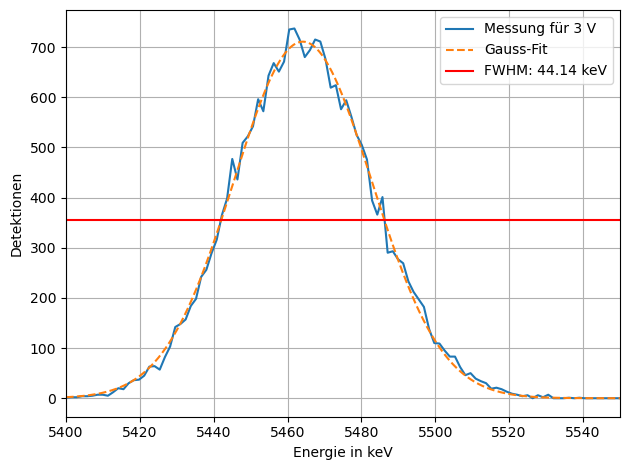

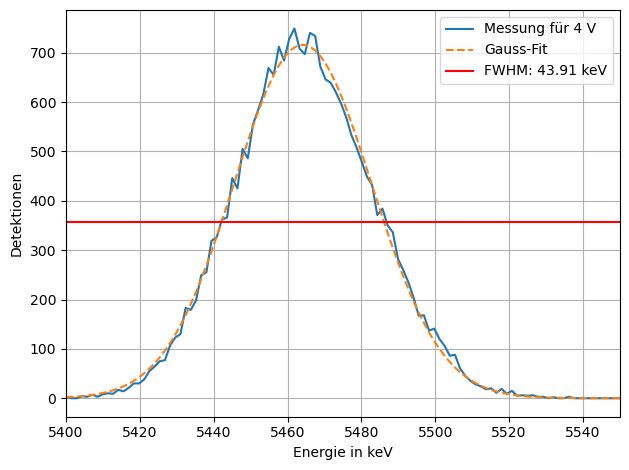

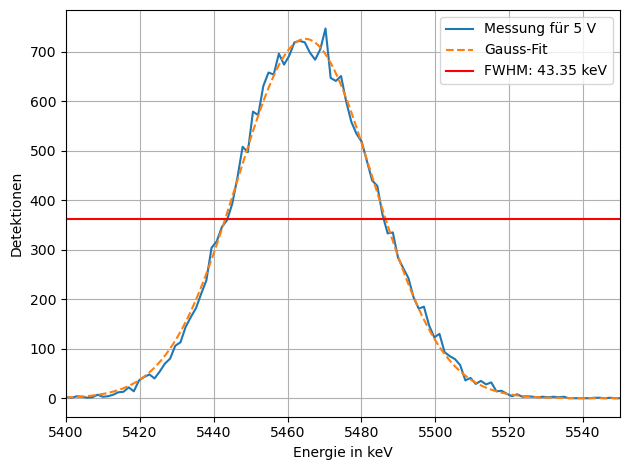

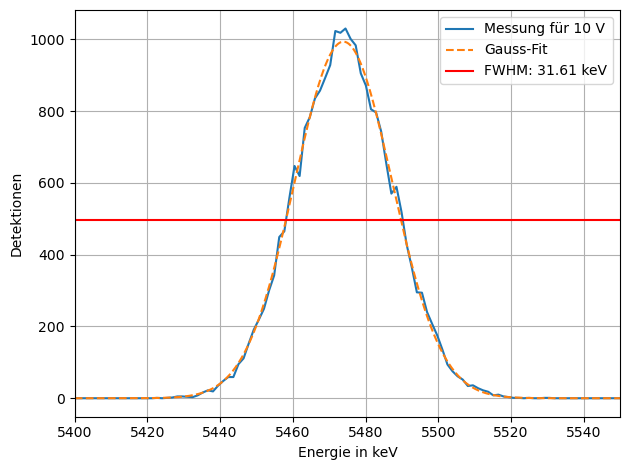

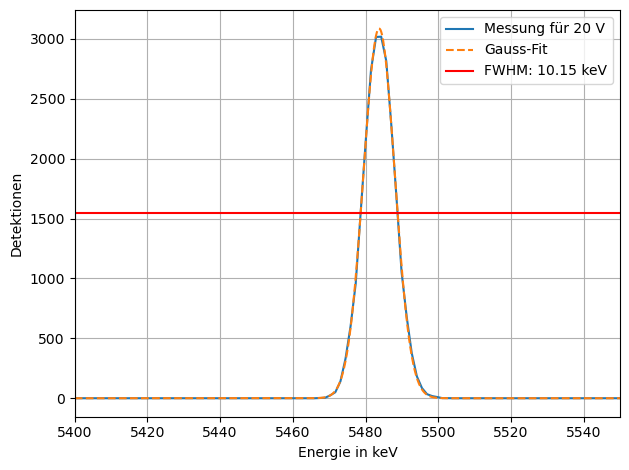

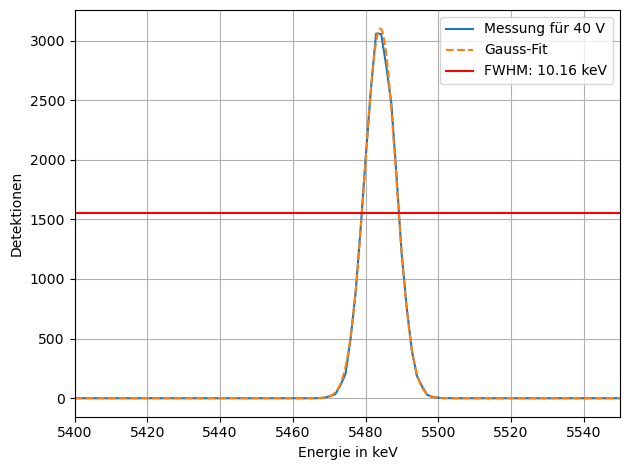

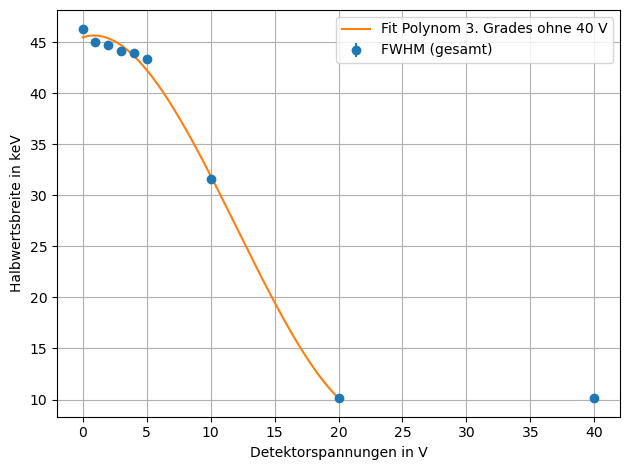

In [19]:
fwhm_list = []
fwhm_error = []
# fwhm_intrin_list = []
# fwhm_rausch_list = []
# fwhm_rausch_error_list = []

for i in cap_volt:
    fit_param = gauss_fit(channel_energies*1e-3,dt['cap_volt_'+str(i)], [2000.,5480.,10])
    a, m, c = fit_param[0]
    fig, ax = plt.subplots()
    ax.plot(channel_energies*1e-3,dt['cap_volt_'+str(i)],label='Messung für '+str(i)+' V')
    x_for_fit = np.linspace(5400.,5600.,1000)
    y_for_fit = list(map(lambda x: gauss(x,a,m,c), x_for_fit))
    ax.plot(x_for_fit,y_for_fit,linestyle='--',label='Gauss-Fit')
    fwhm = 2.0*sqrt(2.0*log(2.0))*c
    fwhm_list.append(fwhm)
    # Start calculating error for fwhm_gesamt
    var_of_std = fit_param[1][2][2]
    print('Standardabweichung: ',c)
    print('Varianz der Standardabweichung :', var_of_std)
    std_of_std = sqrt(var_of_std)
    fwhm_error.append(2.0*sqrt(2.0*log(2.0))*std_of_std)
    # end calculatiing error
    # start calculating fwhm_intrinsisch
    # fwhm_intrin_list.append(fwhm_intrin(m,F)*1e-3)  # Lage des Gauß-Maximums m entspricht der Energie, Umrechnung in keV!
    # end calculating fwhm_intrinsisch
    # start calculating fwhm_rausch and its error
    print('fwhm: ', fwhm)
    # print('fwhm_intrin: ', fwhm_intrin_list[-1])
    # fwhm_rausch_list.append(fwhm_rauschen(fwhm,fwhm_intrin_list[-1]))
    # fwhm_rausch_error_list.append(fwhm*fwhm_error[-1]/sqrt(fwhm**2-fwhm_intrin_list[-1]**2)) 
    # end calculating fwhm_rausch and its error
    ax.axhline(y = 0.5*max(y_for_fit), color = 'r', linestyle = '-',label='FWHM: '+str(round(fwhm,2))+' keV')
    ax.set_xlabel('Energie in keV')
    ax.set_ylabel('Detektionen')
    plt.xlim([5.4e3,5.55e3])
    plt.legend()
    plt.grid()
    plt.tight_layout()

print(fwhm_error)
# print(fwhm_rausch_error_list)


fig, ax = plt.subplots()
ax.errorbar(cap_volt,fwhm_list,yerr=fwhm_error,ls='none',marker='o',label='FWHM (gesamt)')
# ax.plot(cap_volt,fwhm_intrin_list,label='FWHM (intrinsisch)')
# ax.errorbar(cap_volt,fwhm_rausch_list,yerr=fwhm_rausch_error_list,ls='none',marker='x',label='FWHM (Rauschen)')

# Fitte Polynom 3. Grades an Datenpunkte (einmal ohne 20 V und ohne 40 V)
polyfit1 = np.polyfit(cap_volt[:-1],fwhm_list[:-1],3)
print(polyfit1)
c0, c1, c2, c3 = polyfit1
poly_x = np.linspace(cap_volt[0],cap_volt[-2],1000)
ax.plot(poly_x,list(map(lambda x: c0*x**3+c1*x**2+c2*x+c3,poly_x)),label='Fit Polynom 3. Grades ohne 40 V')

# polyfit2 = np.polyfit(cap_volt[:-2]+[cap_volt[-1]],fwhm_list[:-2]+[fwhm_list[-1]],3)
# print(polyfit2)
# c0, c1, c2, c3 = polyfit2
# poly_x = np.linspace(cap_volt[0],cap_volt[-1],1000)
# ax.plot(poly_x,list(map(lambda x: c0*x**3+c1*x**2+c2*x+c3,poly_x)),label='Fit Polynom 3. Grades ohne 20 V')

# polyfit2 = np.polyfit(cap_volt,fwhm_list,3)
# print(polyfit2)
# c0, c1, c2, c3 = polyfit2
# poly_x = np.linspace(cap_volt[0],cap_volt[-1],1000)
# ax.plot(poly_x,list(map(lambda x: c0*x**3+c1*x**2+c2*x+c3,poly_x)),label='Fit Polynom 3. Grades')

ax.set_xlabel('Detektorspannungen in V')
ax.set_ylabel('Halbwertsbreite in keV')

plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('plots/Entwicklung_FWHM_volt.pdf')

Tabellen mit entsprechenden Halbwertsbreiten und Fehlern

In [12]:
from loader import arr_to_tab

fwhm_list = list(map(lambda x: round(x,4),np.array(fwhm_list)))
fwhm_error = list(map(lambda x: round(x,4),np.array(fwhm_error)+0.5e-4))  #Addiere 0.5e-4, da Fehler immer aufgerundet werden
# fwhm_rausch_list = list(map(lambda x: round(x,4),np.array(fwhm_rausch_list)))
# fwhm_rausch_error_list = list(map(lambda x: round(x,4),np.array(fwhm_rausch_error_list)+0.5e-4))
# fwhm_intrin_list = list(map(lambda x: round(x,4),np.array(fwhm_intrin_list)))

arr_to_tab(cap_volt,fwhm_list,fwhm_error) #,fwhm_rausch_list,fwhm_rausch_error_list,fwhm_intrin_list)

i 0
0 
1 0&
2 0&46.2931&
i 1
0 
1 1&
2 1&45.0013&
i 2
0 
1 2&
2 2&44.7005&
i 3
0 
1 3&
2 3&44.1415&
i 4
0 
1 4&
2 4&43.9144&
i 5
0 
1 5&
2 5&43.3466&
i 6
0 
1 10&
2 10&31.6139&
i 7
0 
1 20&
2 20&10.1495&
i 8
0 
1 40&
2 40&10.1552&
